# Callibration plot

In [1]:
# autoload imports
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import plotsandgraphs as pandg

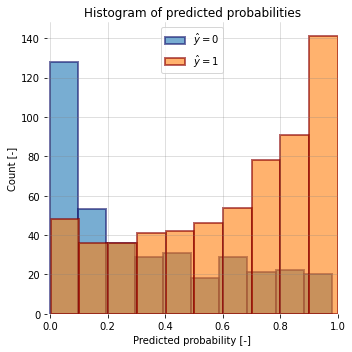

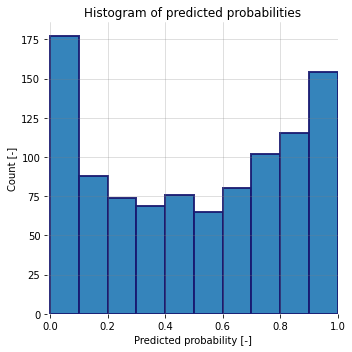

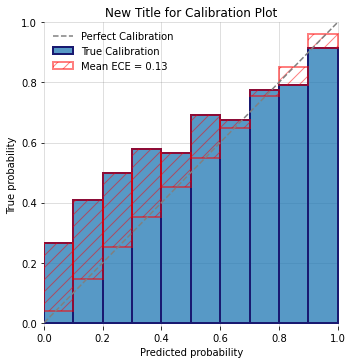

In [2]:
# create some data
n_samples = 1000
y_true = np.random.choice([0,1], n_samples, p=[0.4, 0.6])   # the true class labels 0 or 1, with class imbalance 40:60

y_prob = np.zeros(y_true.shape)   # a model's probability of class 1 predictions
y_prob[y_true==1] = np.random.beta(1, 0.6, y_prob[y_true==1].shape)
y_prob[y_true==0] = np.random.beta(0.5, 1, y_prob[y_true==0].shape)

_ = pandg.binary_classifier.plot_y_prob_histogram(y_prob, y_true, save_fig_path=None)
_ = pandg.binary_classifier.plot_y_prob_histogram(y_prob, save_fig_path=None)

# create figure
fig_auroc = pandg.binary_classifier.plot_calibration_curve(y_prob, y_true, save_fig_path=None)

# customize figure
axes = fig_auroc.get_axes()
ax0 = axes[0]
_ = ax0.set_title('New Title for Calibration Plot')

# save figure
# fig.savefig('calibration_plot.png', bbox_inches='tight')

Bootstrapping: 100%|██████████| 300/300 [00:00<00:00, 315.12it/s]


Bootstrapping: 100%|██████████| 300/300 [00:00<00:00, 501.96it/s]


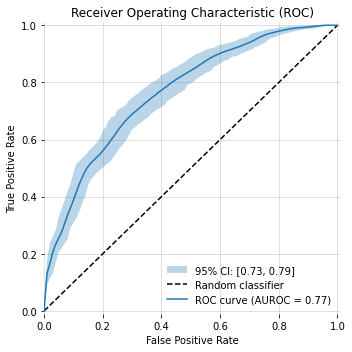

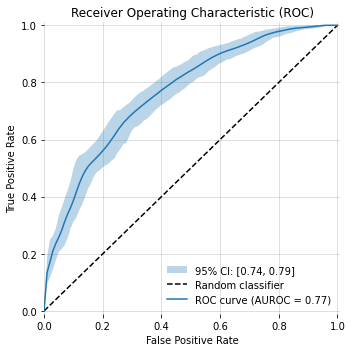

In [3]:
fig = pandg.binary_classifier.plot_roc_curve(y_true, y_prob, n_bootstraps=300, save_fig_path=None)
fig = pandg.binary_classifier.plot_roc_pr_curve("roc", y_true, y_prob, n_bootstraps=300, save_fig_path=None)

Bootstrapping: 100%|██████████| 1/1 [00:00<00:00, 211.64it/s]


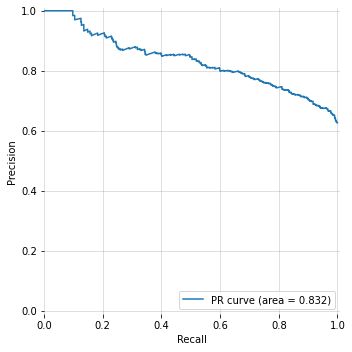

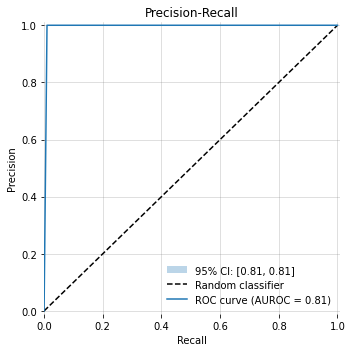

In [5]:
fig = pandg.binary_classifier.plot_pr_curve(y_true, y_prob, save_fig_path=None)
fig = pandg.binary_classifier.plot_roc_pr_curve("pr", y_true, y_prob, n_bootstraps=1, save_fig_path=None)

In [8]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import bootstrap

# # Example dataset and model
# X, y = ...  # Your dataset
# model = RandomForestClassifier()  # Replace with your model

# # Splitting the data and fitting the model once
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# model.fit(X_train, y_train)
# probas_pred = model.predict_proba(X_test)[:, 1]

# Closure for computing Precision-Recall curve
def make_pr_computer(y_test, probas_pred):
    def compute_pr_curve(resampled_indices):
        resampled_y_test, resampled_probas_pred = y_test[resampled_indices], probas_pred[resampled_indices]
        precision, recall, _ = precision_recall_curve(resampled_y_test, resampled_probas_pred)
        return precision, recall
    return compute_pr_curve

# Create a callable for bootstrapping
pr_computer = make_pr_computer(y_true, y_prob)
indices = np.ones(len(y_true), dtype=bool)
print(len(pr_computer(indices)))


# Bootstrapping
n_resamples = 100
test_indices = np.arange(len(y_true))
boot_results = bootstrap((test_indices,), pr_computer, n_resamples=n_resamples, vectorized=False)

# Analyzing the results
# boot_results.confidence_interval, boot_results.bootstrap_distribution, etc.


2


ValueError: could not broadcast input array from shape (2,632) into shape (2,607)

In [7]:
import numpy as np
from scipy.stats import bootstrap
from sklearn.metrics import precision_recall_curve, auc

def bootstrap_pr_auc(y_true, y_scores, n_resamples=1000, confidence_level=0.95):
    # Define the statistic function
    def pr_auc_statistic(*args):
        y_true_sample, y_scores_sample = args
        precision, recall, _ = precision_recall_curve(y_true_sample, y_scores_sample)
        return auc(recall, precision)

    # Perform bootstrap
    res = bootstrap((y_true, y_scores), pr_auc_statistic, n_resamples=n_resamples, 
                    confidence_level=confidence_level, method='percentile', vectorized=False)

    return res


res = bootstrap_pr_auc(y_true, y_prob, n_resamples=100)
ci = res.confidence_interval
print(f"Bootstrap PR AUC Confidence Interval: {ci}")
precision, recall, _ = precision_recall_curve(y_true, y_prob)
ci_mean = auc(recall, precision)
print(f"Mean PR AUC Confidence Interval: {ci_mean}")


Bootstrap PR AUC Confidence Interval: ConfidenceInterval(low=0.5814330377796137, high=0.6534552880987093)
Mean PR AUC Confidence Interval: 0.8323709091377942
